In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = plt.imread('parrots.jpg')/255
num_pix = np.size(image, 0)*np.size(image, 1)
plt.imshow(image)
X = np.reshape(image, (num_pix, 3))

In [ ]:
# Peak signal-to-noise ratio (PSNR)
def psnr(im, im_n):
    '''
    im -- image
    im_n -- noisy approximation
    '''
    m = np.size(im, 0); n = np.size(im, 1)
    mse = 1/(m*n*3)*np.sum((im-im_n)**2)
    psnr = -10*np.log10(mse)
    return psnr

PSNR for mean color: 9.83776
PSNR for median color: 9.46041
PSNR for mean color: 12.112
PSNR for median color: 11.6835
PSNR for mean color: 13.176
PSNR for median color: 12.8075
PSNR for mean color: 14.3943
PSNR for median color: 14.0379
PSNR for mean color: 15.5599
PSNR for median color: 15.2066
PSNR for mean color: 16.5727
PSNR for median color: 16.0824
PSNR for mean color: 17.6719
PSNR for median color: 17.366
PSNR for mean color: 18.4681
PSNR for median color: 18.1756
PSNR for mean color: 19.1449
PSNR for median color: 18.851
PSNR for mean color: 19.6755
PSNR for median color: 19.4506


KeyboardInterrupt: 

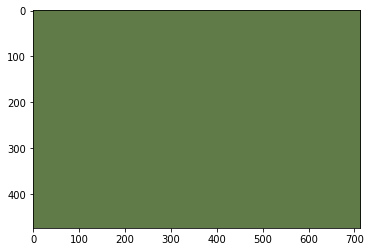

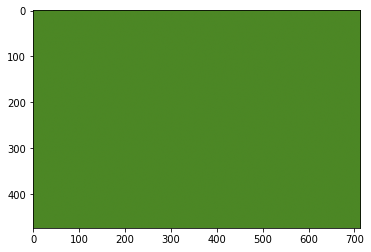

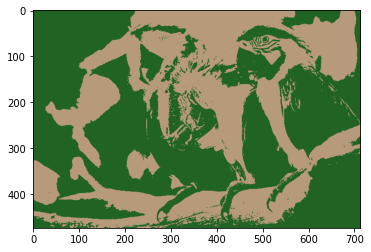

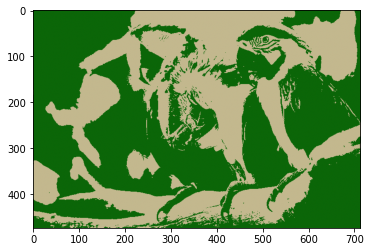

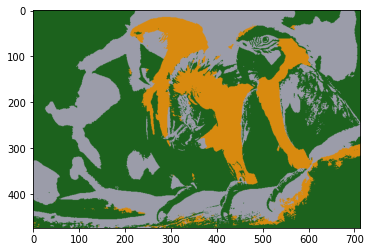

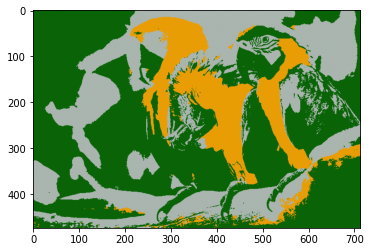

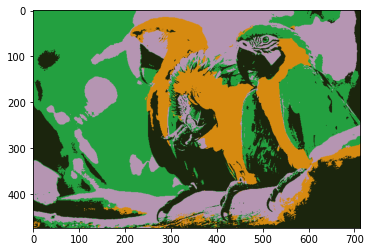

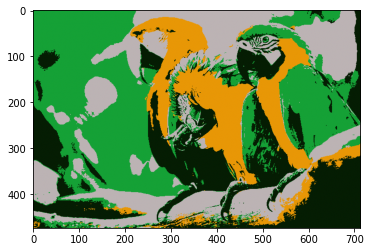

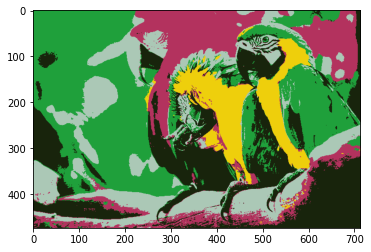

In [ ]:
num_clust = 0
psnr_mean = 0
psnr_median = 0
while psnr_median<16 and psnr_mean<16:
    num_clust += 1
    kmeans = KMeans(n_clusters=num_clust, init='k-means++', random_state=241)
    clusters = kmeans.fit_predict(X)
    # Colors for every pixel
    mean_col = np.zeros((num_pix, 3))
    median_col = np.zeros((num_pix, 3))
    for ii in range(num_clust):
        pix_ind = np.nonzero(clusters == ii)
        mean_col[pix_ind, :] = np.mean(X[pix_ind, :], axis=1)
        median_col[pix_ind, :] = np.median(X[pix_ind, :], axis=1)
    # Now check the image with new colors
    image_mean = np.reshape(mean_col, (np.size(image, 0), np.size(image, 1), 3))
    image_median = np.reshape(median_col, (np.size(image, 0), np.size(image, 1), 3))
    psnr_mean = psnr(image, image_mean)
    psnr_median = psnr(image, image_median)
    print('PSNR for mean color: %g\nPSNR for median color: %g' % 
                        (psnr_mean, psnr_median))
    plt.figure()
    plt.imshow(image_mean)
    plt.figure()
    plt.imshow(image_median)
print('Proper number of clusters: %g' % num_clust)

In [ ]:
# txt_file = open('ans.txt', 'w')
# txt_file.write('%g' % num_clust)
# txt_file.close()